# Table of Contents
 <p><div class="lev1 toc-item"><a href="#1D-spectra" data-toc-modified-id="1D-spectra-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1D spectra</a></div><div class="lev2 toc-item"><a href="#plot-raw-spectra" data-toc-modified-id="plot-raw-spectra-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>plot raw spectra</a></div><div class="lev2 toc-item"><a href="#plot-residuals" data-toc-modified-id="plot-residuals-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>plot residuals</a></div><div class="lev2 toc-item"><a href="#cost-function" data-toc-modified-id="cost-function-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>cost function</a></div><div class="lev2 toc-item"><a href="#plot-cost-function" data-toc-modified-id="plot-cost-function-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>plot cost function</a></div><div class="lev2 toc-item"><a href="#optimise-p-for-PAR" data-toc-modified-id="optimise-p-for-PAR-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>optimise <em>p</em> for PAR</a></div><div class="lev2 toc-item"><a href="#optimise-p-for-ERY" data-toc-modified-id="optimise-p-for-ERY-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>optimise <em>p</em> for ERY</a></div><div class="lev1 toc-item"><a href="#2D-spectra" data-toc-modified-id="2D-spectra-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2D spectra</a></div><div class="lev2 toc-item"><a href="#cost-function" data-toc-modified-id="cost-function-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>cost function</a></div><div class="lev2 toc-item"><a href="#get-neutral-model-spectra" data-toc-modified-id="get-neutral-model-spectra-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>get neutral model spectra</a></div><div class="lev2 toc-item"><a href="#optimise-p" data-toc-modified-id="optimise-p-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>optimise <em>p</em></a></div><div class="lev2 toc-item"><a href="#sensitivity-of-p-to-the-&quot;neutral&quot;-model" data-toc-modified-id="sensitivity-of-p-to-the-&quot;neutral&quot;-model-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>sensitivity of <em>p</em> to the "neutral" model</a></div><div class="lev3 toc-item"><a href="#doubling-divergence-time" data-toc-modified-id="doubling-divergence-time-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>doubling divergence time</a></div><div class="lev3 toc-item"><a href="#halfing-divergence-time" data-toc-modified-id="halfing-divergence-time-242"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>halfing divergence time</a></div><div class="lev1 toc-item"><a href="#marginal-spectra" data-toc-modified-id="marginal-spectra-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>marginal spectra</a></div><div class="lev1 toc-item"><a href="#save-modified-spectra" data-toc-modified-id="save-modified-spectra-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>save modified spectra</a></div>

# 1D spectra

In [19]:
# load dadi module

import sys

import numpy as np

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

In [2]:
%less PAR.unfolded.sfs

In [2]:
# load 1D spectra from file

fs_ery = dadi.Spectrum.from_file("ERY.unfolded.sfs")

fs_par = dadi.Spectrum.from_file("PAR.unfolded.sfs")

See lines 1429-1435 and 1661-1664 in [assembly.sh](https://github.com/claudiuskerth/PhDthesis/blob/master/Data_analysis/SNP-indel-calling/assembly.sh) for the command lines that created these 1D unfolded spectra. Only sites with data from at least 9 individuals were included in the analysis.

## plot raw spectra

In [23]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [14, 12]
plt.rcParams['font.size'] = 14

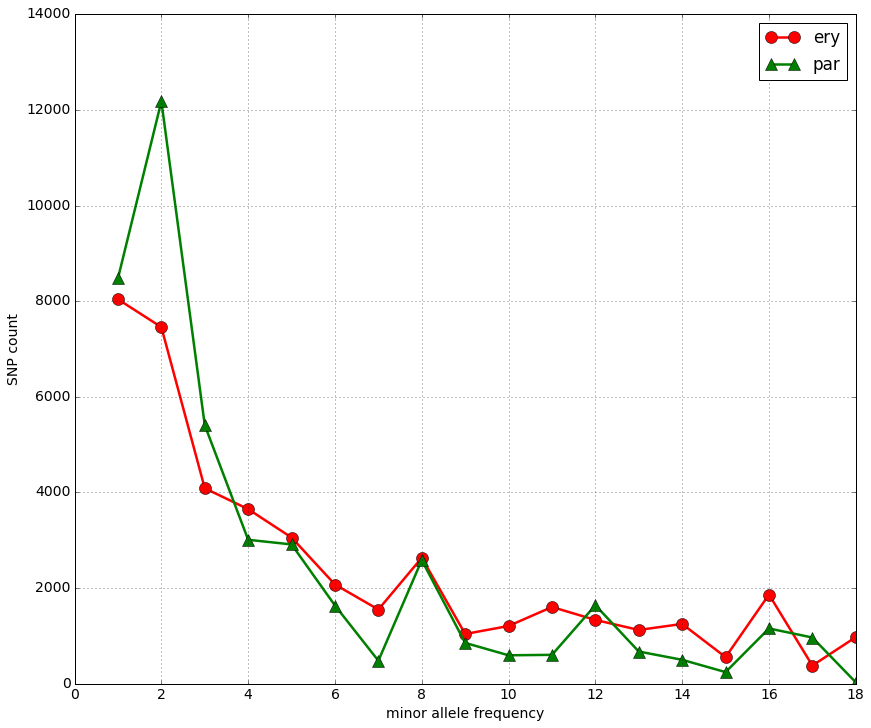

In [4]:
plt.grid()
plt.plot(fs_ery.fold(), 'ro-', label='ery', linewidth=2.5, markersize=12)
plt.plot(fs_par.fold(), 'g^-', label='par', linewidth=2.5, markersize=12)
plt.xlabel("minor allele frequency")
plt.ylabel("SNP count")
plt.legend()

The site frequency spectrum should be roughly proportional to $1/p$, $p$ being the minor allele frequency, for any demographic history or selection regime. In particular the first and second frequency classes ($p=1$ and $p=2$) are deviating from this. 

In [3]:
# fold spectra
fs_ery = fs_ery.fold()
fs_par = fs_par.fold()

## plot residuals

In [6]:
# make the extrapolating version of the standard neutral model function
func_ex = dadi.Numerics.make_extrap_log_func(dadi.Demographics1D.snm)

# setting the smallest grid size slightly larger than the largest population sample size
pts_l = [40, 50, 60]

ns = fs_ery.sample_sizes

# calculate unfolded AFS under standard neutral model (up to a scaling factor theta)
snm = func_ex(0, ns, pts_l)
snm = snm.fold()

# scaled snm spectrum for ERY
snm_ery = dadi.Inference.optimally_scaled_sfs(snm, fs_ery)

# scaled snm spectrum for PAR
snm_par = dadi.Inference.optimally_scaled_sfs(snm, fs_par)

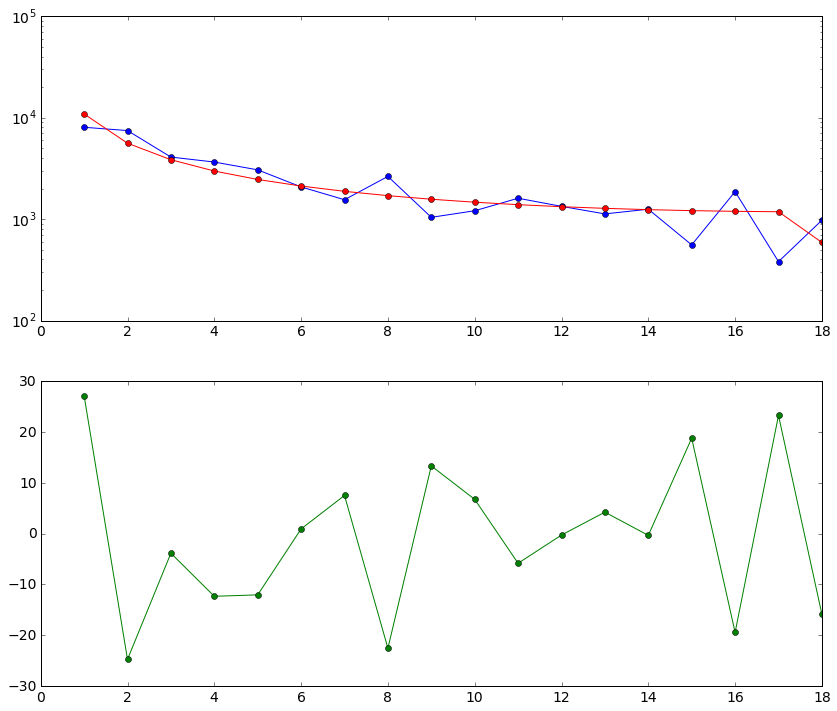

In [7]:
dadi.Plotting.plot_1d_comp_multinom(snm_ery[:19], fs_ery[:19], residual='linear')

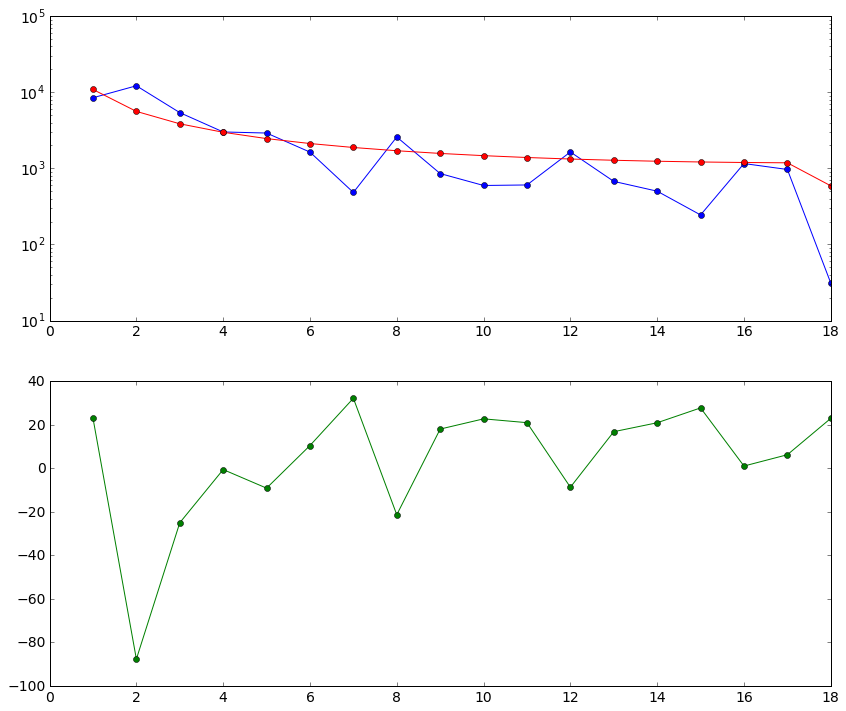

In [8]:
dadi.Plotting.plot_1d_comp_multinom(snm_par[:19], fs_par[:19], residual='linear')

The lower plot (green line) is for the scaled Poisson residuals. 

$$
residuals = (model - data)/\sqrt{model}
$$

The model is the expected counts in each frequency class. If these counts are Poisson distributed, then their variance is equal to their expectation. The differences between model and data are therefore scaled by the expected standard deviation of the model counts.

Ludovic has suggested optimising for a fraction $p$ of all SNP's that lie on the X chromosome. SNP's on the X chromosome are counted twice in the SFS since all sequenced individuals were male and _C. parallelus_ males have no Y chromosome homologous to the X. This fraction $p$ should therefore be subtracted from even frequency classes and added to the respective frequency class that contains SNP's that are 1/2 as frequent, e. g. from class 2 --> 1 or from 8 --> 4. One could optimise for the minimum deviation from a neutral spectrum.

In [4]:
# number of segregating sites in ERY spectrum
fs_ery.S()

43905.909479000002

In [5]:
# total number of sites in ERY spectrum 
fs_ery.data.sum()

1638467.9999999998

In [6]:
# number of segregating sites in PAR spectrum
fs_par.S()

43969.638017000005

In [7]:
# total number of sites in PAR spectrum
fs_par.data.sum()

1214938.9999990002

PAR has about the same number of SNP's as ERY, but these are distributed over a sequence length about 1/4 shorter than in ERY.

Since the ERY and PAR spectra have almost the same number of SNP's, the scaled standard neutral spectra are also almost the same.

Deviation from these standard neutral model spectra shall be minimised.

## cost function

Now I need to write a cost function: it should take _p_ (the fraction of SNP's on the X chromosome), modify the observed SFS and return the sum of squared deviations between the modified SFS and the standard neutral model SFS.

In [8]:
# turn on floating point division by default, old behaviour via '//'
from __future__ import division

In [9]:
p = 1/2
p

0.5

In [10]:
# the spectrum object is a masked numpy array
fs_par.mask

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [11]:
# make copy of SFS, we don't want to modify the original in place
sfs = fs_par.copy()

In [12]:
sfs[1] = 0
sfs

Spectrum([-- 0.0 12178.820193000001 5406.5333949999995 3011.110214 2913.832499
 1636.870339 482.55990800000006 2585.787032 854.9897370000001 595.999852
 605.580566 1642.878191 674.760989 501.638502 244.455727 1157.254931
 967.4315409999999 31.079364 -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- --], folded=True, pop_ids=None)

In [13]:
fs_par

Spectrum([-- 8478.055037 12178.820193000001 5406.5333949999995 3011.110214
 2913.832499 1636.870339 482.55990800000006 2585.787032 854.9897370000001
 595.999852 605.580566 1642.878191 674.760989 501.638502 244.455727
 1157.254931 967.4315409999999 31.079364 -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- --], folded=True, pop_ids=None)

In [14]:
sfs = fs_par.copy()

In [15]:
# test
for i in range(len(sfs)):
    if not i%2:
        print i, i//2

0 0
2 1
4 2
6 3
8 4
10 5
12 6
14 7
16 8
18 9
20 10
22 11
24 12
26 13
28 14
30 15
32 16
34 17
36 18


In [16]:
# modifies sfs
for i in range(len(sfs)): # from 0..36 in this case
    if not sfs.mask[i]: # if count category is not masked (i. e index 1..18)
        if not i%2: # if count class is a multiple of 2
            #print i//2
            deduct = sfs[i] * p # get the proportion p of MAF counts in this class
            sfs[i] -= deduct # remove this count from the frequency class
            j = i//2 # get the frequency class that corresponds to the haploid genotype
            sfs[j] += deduct # add the deducted count to this frequency class

In [17]:
sfs

Spectrum([-- 14567.465133500002 7594.965203500001 6224.968564499999 2798.448623
 3211.832425 1639.874265 733.3791590000001 1871.5209815 870.5294190000001
 297.999926 605.580566 821.4390955 674.760989 250.819251 244.455727
 578.6274655 967.4315409999999 15.539682 -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- --], folded=True, pop_ids=None)

In [20]:
sfs.data.sum()

1214938.9999990002

In [21]:
fs_par.data.sum()

1214938.9999990002

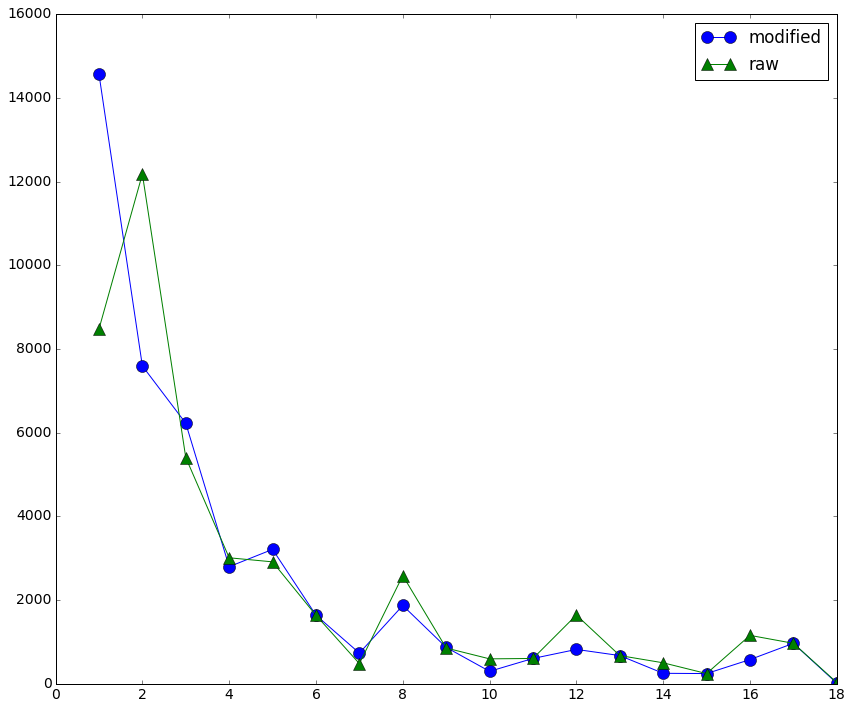

In [24]:
plt.plot(sfs, 'bo-', markersize=12, label="modified")
plt.plot(fs_par, 'g^-', markersize=12, label='raw')
plt.legend()

The modification with an arbitrary _p_ of 0.5 seems to work.

In [22]:
# define function that modifies a SFS with a given p
def modify(p, sfs):
    """
    modifies SFS with given p
    subtracts proportion p from even count classes and adds to corresponding 
    haploid count class, e. g. from 2 onto 1 or from 16 onto 8
    returns modified sfs
    """
    fs = sfs.copy() # it is necessary to make sure that a copy of the observed SFS is
    # made here for each function evaluation
    
    # modify observed SFS with given p:
    for i in range(len(fs)):
        if not fs.mask[i]:
            if not i%2:
                deduct = fs[i] * p
                fs[i] -= deduct
                j = i//2
                fs[j] += deduct
    return fs

In [4]:
import numpy as np

In [24]:
# define cost function used for optimisation
def f(p, snm, sfs):
    """
    p: proportion of all SNP's on the X chromosome [float, 0<p<1]
    snm: standard neutral model spectrum (optimally scaled)
    sfs: observed SFS 
    """
    
    # modify sfs
    fs = modify(p, sfs)
            
    # return sum of squared deviations of modified SFS with snm spectrum:
    return np.sum( (fs - snm)**2 )  # note, due to the mask it is necessary to use the numpy sum function 

In [25]:
fs_par

Spectrum([-- 8478.055037 12178.820193000001 5406.5333949999995 3011.110214
 2913.832499 1636.870339 482.55990800000006 2585.787032 854.9897370000001
 595.999852 605.580566 1642.878191 674.760989 501.638502 244.455727
 1157.254931 967.4315409999999 31.079364 -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- --], folded=True, pop_ids=None)

In [26]:
# test cost function
f(0.5, snm_par, fs_par)

31032447.579653159

In [27]:
# get cost when modifiying snm spectrum with p of 0
# the cost should be 0
f(0.0, snm_par, snm_par)

0.0

In [28]:
# get cost when modifying snm with p of 0.001
# the cost should be slightly greater than 0
f(0.001, snm_par, snm_par.copy())

56.680295037473329

The cost function seems to be correct.

## plot cost function

In [29]:
x = np.linspace(0, 1, 100)
y = map(lambda x: f(x, snm_par, fs_par), x)

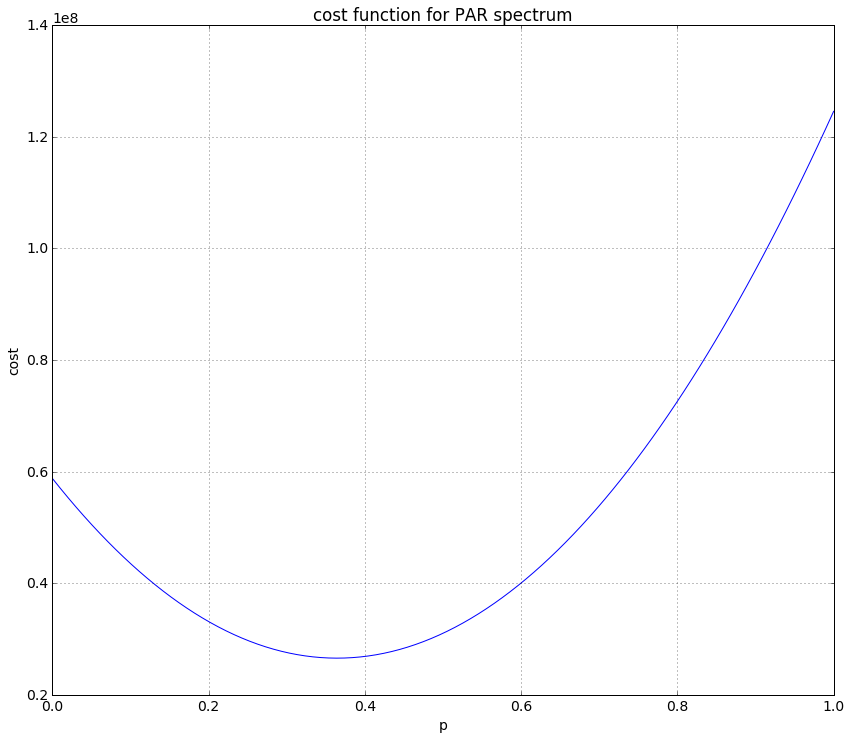

In [30]:
plt.plot(x, y)
plt.grid()
plt.xlabel("p")
plt.ylabel("cost")
plt.title("cost function for PAR spectrum")

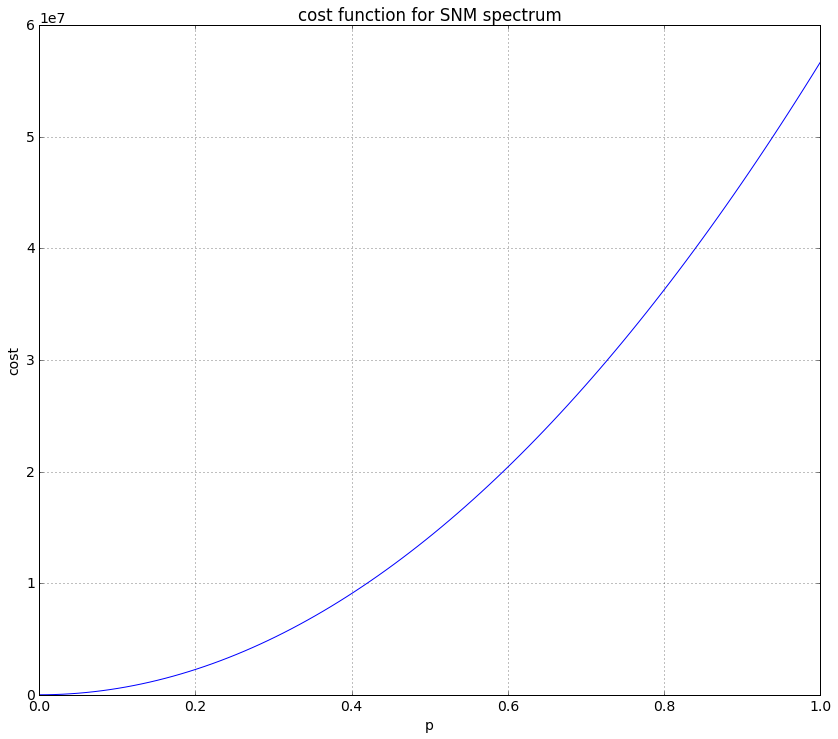

In [31]:
x = np.linspace(0, 1, 100)
y = map(lambda x: f(x, snm_par, snm_par), x)
plt.plot(x, y)
plt.grid()
plt.xlabel("p")
plt.ylabel("cost")
plt.title("cost function for SNM spectrum")

As expected, the optimal value of _p_ when trying to modify the `snm` spectrum to better fit the `snm` spectrum is 0.

## optimise _p_ for PAR

In [32]:
from scipy.optimize import minimize_scalar

In [38]:
minimize_scalar?

In [33]:
# test optimisation
# the function to optimise (cost function) 'f' gets the optimally scaled standard neutral SFS for PAR
# and the standard neutral SFS for PAR to modify
# I want to see an optimal value for p of zero as shown in the plot of the cost function above.
res_test = minimize_scalar(f, method = 'bounded', bounds = (-1.0, 1.0), args = (snm_par, snm_par))

In [34]:
res_test

     fun: 0.0
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 5.5511151231257827e-17

This makes sense: the optimal value is practically zero.

In [35]:
# check that original SFS has not been modified
fs_par

Spectrum([-- 8478.055037 12178.820193000001 5406.5333949999995 3011.110214
 2913.832499 1636.870339 482.55990800000006 2585.787032 854.9897370000001
 595.999852 605.580566 1642.878191 674.760989 501.638502 244.455727
 1157.254931 967.4315409999999 31.079364 -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- --], folded=True, pop_ids=None)

In [36]:
# run optimisation
# the function to optimise (cost function) 'f' gets the optimally scaled standard neutral SFS for PAR
# and the observed SFS of PAR. The optimal value should be somewhat below 0.4 as shown in the 
# plot of the cost function above.
res_par = minimize_scalar(f, method = 'bounded', bounds = (-1.0, 1.0), args = (snm_par, fs_par))

In [37]:
res_par

     fun: 26568859.884093955
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.36433639778394755

This makes sense. The optimal value of $p$ is 0.36, which would mean that 36% of all SNP's lie on the X chromosome or are affected by "calling" of heterozgotes as homozygotes due to PCR drift or binomial allele sampling error.

In [38]:
# get modified SFS with optimal p
fs_par_m = modify(res_par.x, fs_par)
fs_par_m

Spectrum([-- 12915.242515376021 8838.689763323191 6002.9048379506485
 2856.1494979761137 3130.976938157446 1639.0592181560992 665.3250728084156
 2065.320792202926 866.3130805251762 378.8554128425542 605.580566
 1044.317868893252 674.760989 318.8733371915845 244.455727
 735.6248381217492 967.4315409999999 19.756020474823902 -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=None)

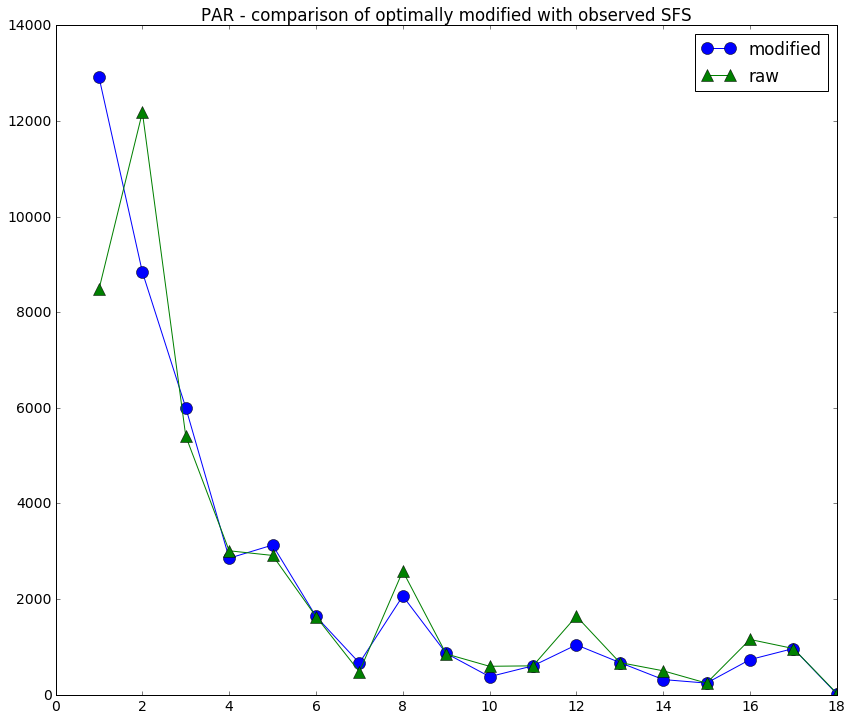

In [40]:
plt.plot(fs_par_m, 'bo-', markersize=12, label="modified")
plt.plot(fs_par, 'g^-', markersize=12, label='raw')
plt.title("PAR - comparison of optimally modified with observed SFS")
plt.legend()

This modification looks good to me. It doesn't seem to change the general right-skew of the observed SFS, i. e. excess of low frequency variants and stays fairly close to the observed SFS for the frequency classes greater 2.

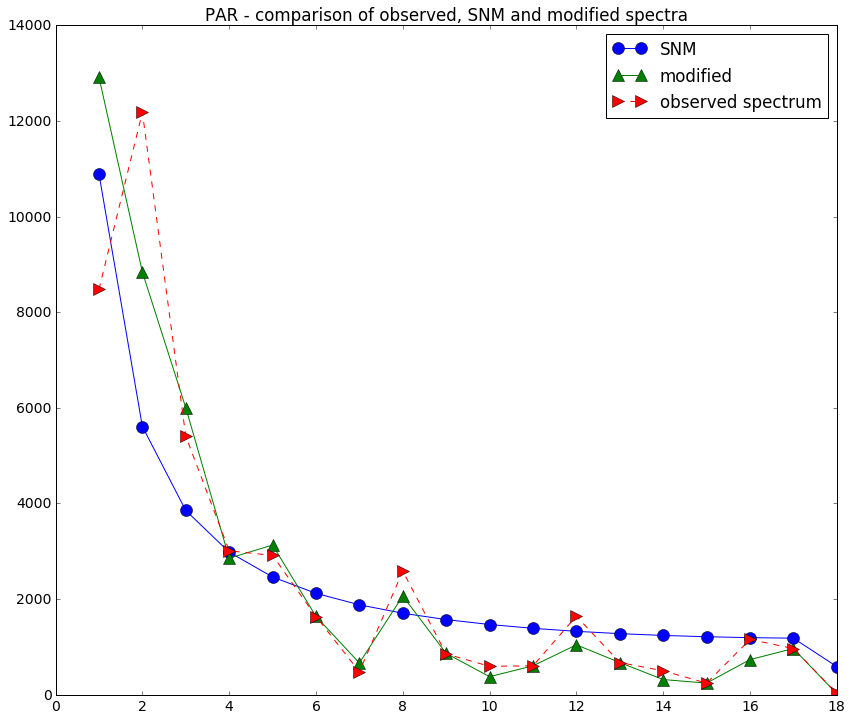

In [43]:
plt.plot(snm_par, 'bo-', markersize=12, label="SNM")
plt.plot(fs_par_m, 'g^-', markersize=12, label='modified')
plt.plot(fs_par, 'r>--', markersize=12, label='observed spectrum')
plt.title("PAR - comparison of observed, SNM and modified spectra")
plt.legend()

The modification does not seem to introduce an obvious bias towards the standard neutral model spectrum (SNM).

In [81]:
dadi.Spectrum.tofile?

## optimise _p_ for ERY

In [45]:
# run optimisation
# the function to optimise (objective function) 'f' gets the optimally scaled standard neutral SFS for ERY
# and a copy of the observed SFS of ERY
res_ery = minimize_scalar(f, method = 'bounded', bounds = (-1.0, 1.0), args = (snm_ery, fs_ery))

In [46]:
res_ery

     fun: 4973116.0582852894
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.34106859148429103

The optimal value of $p$ is close to the value estimated for PAR, which is what I would expect.

In [47]:
# get modified SFS with optimal p
fs_ery_m = modify(res_ery.x, fs_ery)

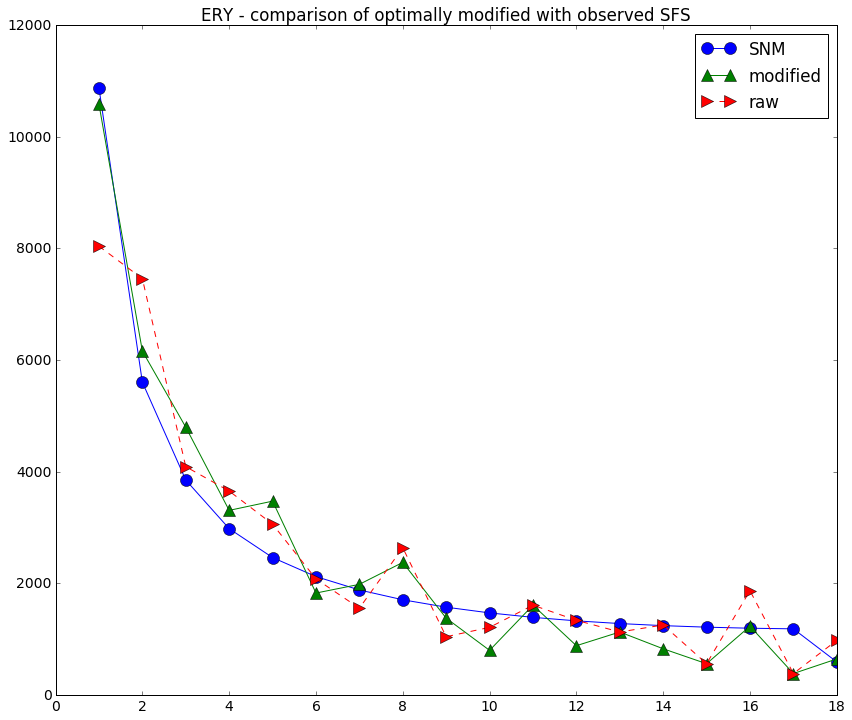

In [48]:
plt.plot(snm_ery, 'bo-', markersize=12, label="SNM")
plt.plot(fs_ery_m, 'g^-', markersize=12, label="modified")
plt.plot(fs_ery, 'r>--', markersize=12, label='raw')
plt.title("ERY - comparison of optimally modified with observed SFS")
plt.legend()

The modification does not seem to introduce a bias toward an SNM spectrum.

This seems to be a reasonable modification.

# 2D spectra

In [3]:
sfs2d = dadi.Spectrum.from_file("dadiExercises/EryPar.unfolded.2dsfs.dadi_format")

In [4]:
sfs2d.pop_ids = ['ery', 'par']

In [39]:
%matplotlib inline

import pylab
import numpy as np

plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 14

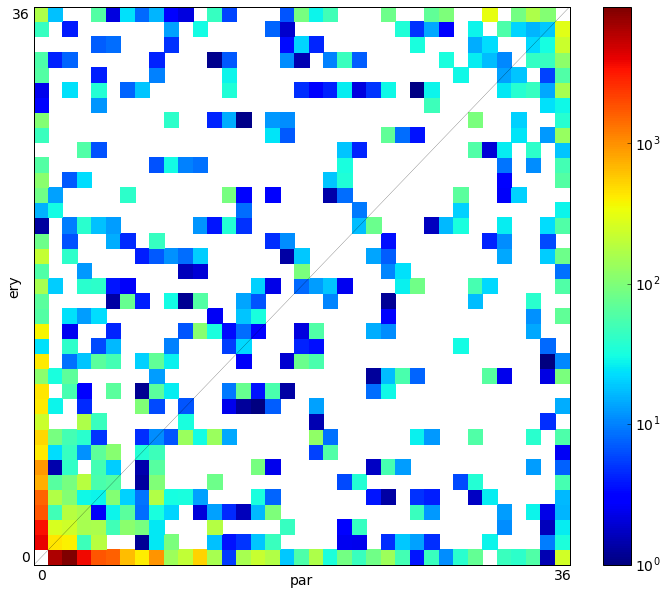

In [11]:
# plot unfoled spectrum
dadi.Plotting.plot_single_2d_sfs(sfs2d, vmin=1, cmap=pylab.cm.jet)

In [12]:
sfs2d = sfs2d.fold()

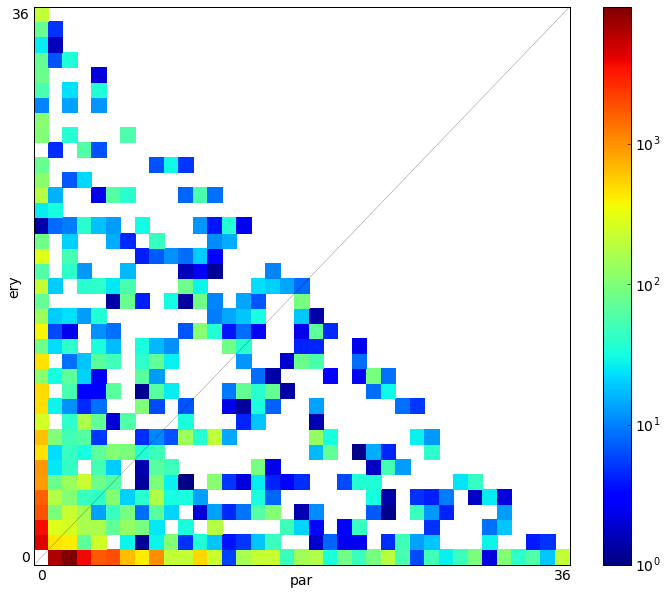

In [13]:
# plot folded spectrum
dadi.Plotting.plot_single_2d_sfs(sfs2d, vmin=1, cmap=pylab.cm.jet)

In [14]:
sfs2d

Spectrum([[-- 6651.315570000001 9534.20133 ..., 59.216701 19.075761999999997
  208.9562905]
 [4407.352191 453.932731 409.549382 ..., 3.9669600000000003
  4.851331999999999 --]
 [3746.5561820000003 295.73506799999996 261.799583 ..., 1e-06 -- --]
 ..., 
 [26.699661 1.593931 1e-06 ..., -- -- --]
 [78.253372 4.851332 -- ..., -- -- --]
 [208.9562905 -- -- ..., -- -- --]], folded=True, pop_ids=['ery', 'par'])

In [15]:
sfs2d.mask

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True,  True],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]], dtype=bool)

I now would like to apply the same modification on the 2D spectrum.

In [16]:
if not 3%2:
    print 3//2

In [17]:
for i in range(len(sfs2d)):
    for j in range(len(sfs2d[i])):
        if not sfs2d.mask[i][j]:
            if not i%2 or not j%2: # if PAR or ERY index are even
                print i, j,
                print "-->",
                if not i%2: # if PAR index is even
                    k = i//2 # get half of index
                else:
                    k = i
                if not j%2: # if ERY index is even
                    l = j//2 # get half of index
                else:
                    l = j
                print k, l

0 1 --> 0 1
0 2 --> 0 1
0 3 --> 0 3
0 4 --> 0 2
0 5 --> 0 5
0 6 --> 0 3
0 7 --> 0 7
0 8 --> 0 4
0 9 --> 0 9
0 10 --> 0 5
0 11 --> 0 11
0 12 --> 0 6
0 13 --> 0 13
0 14 --> 0 7
0 15 --> 0 15
0 16 --> 0 8
0 17 --> 0 17
0 18 --> 0 9
0 19 --> 0 19
0 20 --> 0 10
0 21 --> 0 21
0 22 --> 0 11
0 23 --> 0 23
0 24 --> 0 12
0 25 --> 0 25
0 26 --> 0 13
0 27 --> 0 27
0 28 --> 0 14
0 29 --> 0 29
0 30 --> 0 15
0 31 --> 0 31
0 32 --> 0 16
0 33 --> 0 33
0 34 --> 0 17
0 35 --> 0 35
0 36 --> 0 18
1 0 --> 1 0
1 2 --> 1 1
1 4 --> 1 2
1 6 --> 1 3
1 8 --> 1 4
1 10 --> 1 5
1 12 --> 1 6
1 14 --> 1 7
1 16 --> 1 8
1 18 --> 1 9
1 20 --> 1 10
1 22 --> 1 11
1 24 --> 1 12
1 26 --> 1 13
1 28 --> 1 14
1 30 --> 1 15
1 32 --> 1 16
1 34 --> 1 17
2 0 --> 1 0
2 1 --> 1 1
2 2 --> 1 1
2 3 --> 1 3
2 4 --> 1 2
2 5 --> 1 5
2 6 --> 1 3
2 7 --> 1 7
2 8 --> 1 4
2 9 --> 1 9
2 10 --> 1 5
2 11 --> 1 11
2 12 --> 1 6
2 13 --> 1 13
2 14 --> 1 7
2 15 --> 1 15
2 16 --> 1 8
2 17 --> 1 17
2 18 --> 1 9
2 19 --> 1 19
2 20 --> 1 10
2 21 --> 1 21

This shows from which cell to which cell the transferral of SNP count takes place. A proportion $p$ of the SNP count in a cell would be deducted and added to the cell that corresponds to half the allele count in PAR, ERY or both. That means if the allele count (equal to index) in the source cell for one population (ERY or PAR) is an odd number, this index will not be changed to find the target cell, only the index of the other population, which must be even to do a transferral at all.

In [18]:
x = sfs2d.data.copy()
x

array([[  1.07020142e+06,   6.65131557e+03,   9.53420133e+03, ...,
          5.92167010e+01,   1.90757620e+01,   2.08956290e+02],
       [  4.40735219e+03,   4.53932731e+02,   4.09549382e+02, ...,
          3.96696000e+00,   4.85133200e+00,   0.00000000e+00],
       [  3.74655618e+03,   2.95735068e+02,   2.61799583e+02, ...,
          1.00000000e-06,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  2.66996610e+01,   1.59393100e+00,   1.00000000e-06, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.82533720e+01,   4.85133200e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.08956290e+02,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [19]:
x[0][0] = 1

In [20]:
x

array([[  1.00000000e+00,   6.65131557e+03,   9.53420133e+03, ...,
          5.92167010e+01,   1.90757620e+01,   2.08956290e+02],
       [  4.40735219e+03,   4.53932731e+02,   4.09549382e+02, ...,
          3.96696000e+00,   4.85133200e+00,   0.00000000e+00],
       [  3.74655618e+03,   2.95735068e+02,   2.61799583e+02, ...,
          1.00000000e-06,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  2.66996610e+01,   1.59393100e+00,   1.00000000e-06, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.82533720e+01,   4.85133200e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.08956290e+02,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [21]:
# check that original sfs has not changed
sfs2d.data

array([[  1.07020142e+06,   6.65131557e+03,   9.53420133e+03, ...,
          5.92167010e+01,   1.90757620e+01,   2.08956290e+02],
       [  4.40735219e+03,   4.53932731e+02,   4.09549382e+02, ...,
          3.96696000e+00,   4.85133200e+00,   0.00000000e+00],
       [  3.74655618e+03,   2.95735068e+02,   2.61799583e+02, ...,
          1.00000000e-06,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  2.66996610e+01,   1.59393100e+00,   1.00000000e-06, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.82533720e+01,   4.85133200e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.08956290e+02,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

This seems to work without Warning.

In [22]:
sfs = sfs2d.data.copy()

In [23]:
p = 0.5

In [24]:
for i in range(len(sfs)):
    for j in range(len(sfs[i])):
        if not sfs2d.mask[i][j]:
            if not i%2 or not j%2:
                deduct = sfs[i][j] * p
                sfs[i][j] -= deduct
                if not i%2:
                    k = i//2
                else:
                    k = i
                if not j%2:
                    l = j//2
                else:
                    l = j
                sfs[k][l] += deduct

In [25]:
# recreate dadi Spectrum object
sfs2d_m = dadi.Spectrum(data=sfs, mask=sfs2d.mask, data_folded=True, pop_ids=['ery', 'par'])

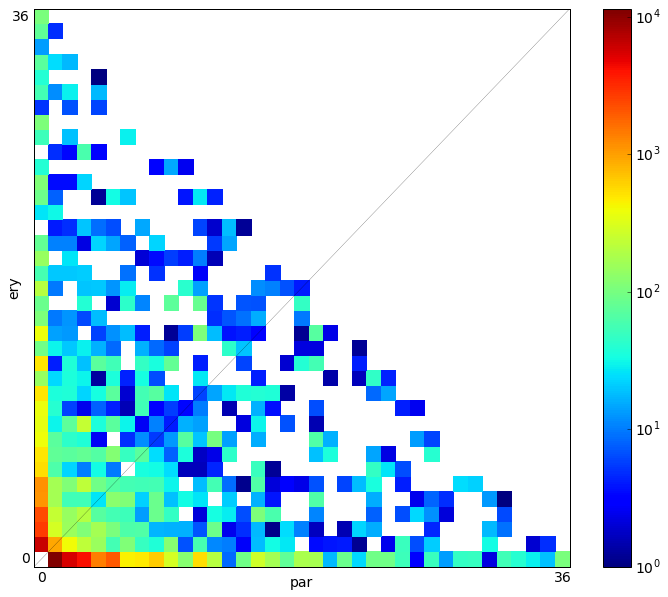

In [26]:
dadi.Plotting.plot_single_2d_sfs(sfs2d_m, vmin=1, cmap=pylab.cm.jet)

This does look pretty good to me.

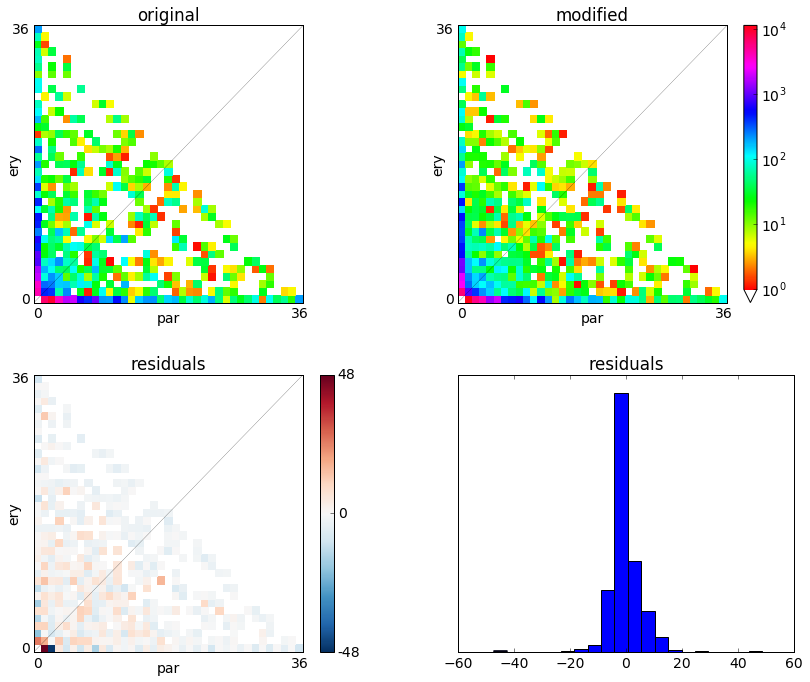

In [27]:
dadi.Plotting.plot_2d_comp_multinom(data=sfs2d, model=sfs2d_m, vmin=1, title=['original', 'modified'])

I think the modification does a good job.

## cost function

In [28]:
def modify2D(p, sfs):
    """
    modifies an sfs with given p
    returns modified sfs
    leaves original sfs unchanged
    """
    # make copy of 2D array for modification
    fs = sfs.data.copy()
    
    for i in range(len(fs)):
        for j in range(len(fs[i])):
            if not sfs.mask[i][j]:
                if not i%2 or not j%2:
                    deduct = fs[i][j] * p
                    fs[i][j] -= deduct
                    if not i%2:
                        k = i//2
                    else:
                        k = i
                    if not j%2:
                        l = j//2
                    else:
                        l = j
                    fs[k][l] += deduct

    # recreate a dadi Spectrum object                
    fs_m = dadi.Spectrum(data=fs, mask=sfs.mask, data_folded=True, pop_ids=['ery', 'par'])
                
    return fs_m

In [29]:
# define cost function used for optimisation
def f_2D(p, snm, sfs):
    """
    p: proportion of all SNP's on the X chromosome [float, 0<p<1]
    snm: standard neutral model spectrum (optimally scaled)
    sfs: observed SFS 
    """
    
    # modify sfs
    fs = modify2D(p, sfs)
            
    # return sum of squared deviations of modified SFS with snm spectrum:
    return np.sum( (fs - snm)**2 )  # note, due to the mask it is necessary to use the numpy sum function 

## get neutral model spectra

In [30]:
dadi.Demographics2D.snm?

In [31]:
# make the extrapolating version of the demographic model function
func_ex = dadi.Numerics.make_extrap_log_func(dadi.Demographics2D.snm)

# setting the smallest grid size slightly larger than the largest population sample size

pts_l = [40, 50, 60]

ns = sfs2d.sample_sizes

# calculate unfolded AFS under standard neutral model (up to a scaling factor theta)

snm = func_ex(0, ns, pts_l)
snm = snm.fold()

# scaled snm spectrum
snm = dadi.Inference.optimally_scaled_sfs(snm, sfs2d)

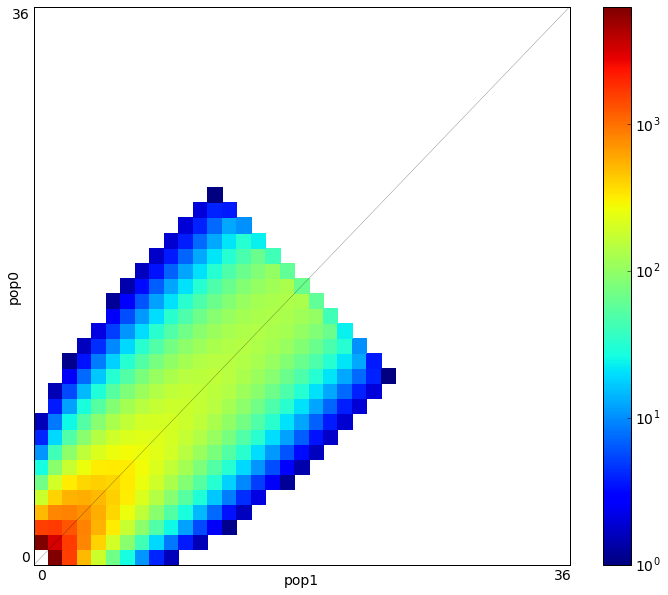

In [32]:
dadi.Plotting.plot_single_2d_sfs(snm, vmin=1, cmap=pylab.cm.jet)

I don't think that this would be a good model spectrum for fitting. We know that ERY and PAR are highly diverged and certainly not a single panmictic population.

I think the most parsimonious model would be a simple divergence in isolation model.

In [33]:
def split_nomig(params, ns, pts):
    """
    params = (nu1,nu2,T)
    ns = (n1,n2)

    Split into two populations of specifed size, no migration.

    nu1: Size of population 1 after split.
    nu2: Size of population 2 after split.
    T: Time in the past of split (in units of 2*Na generations) 
    n1,n2: Sample sizes of resulting Spectrum
    pts: Number of grid points to use in integration.
    """
    nu1,nu2,T = params

    xx = dadi.Numerics.default_grid(pts)

    phi = dadi.PhiManip.phi_1D(xx)
    phi = dadi.PhiManip.phi_1D_to_2D(xx, phi)

    phi = dadi.Integration.two_pops(phi, xx, T, nu1, nu2, m12=0, m21=0)

    fs = dadi.Spectrum.from_phi(phi, ns, (xx,xx))
    return fs

This model takes three parameters. I am going to assume that $\nu_1=\nu_2=1$ and that $T=1$.

In [34]:
# make the extrapolating version of the demographic model function
func_ex = dadi.Numerics.make_extrap_log_func(split_nomig)

In [35]:
# calculate unfolded AFS under divergence in isolation model (dim) (up to a scaling factor theta)
params = (1, 1, 1)

ns = sfs2d.sample_sizes
pts_l = [40, 50, 60]

dim = func_ex(params, ns, pts_l)
dim = dim.fold()

# optimally scale divergence in isolation model spectrum
dim = dadi.Inference.optimally_scaled_sfs(dim, sfs2d)

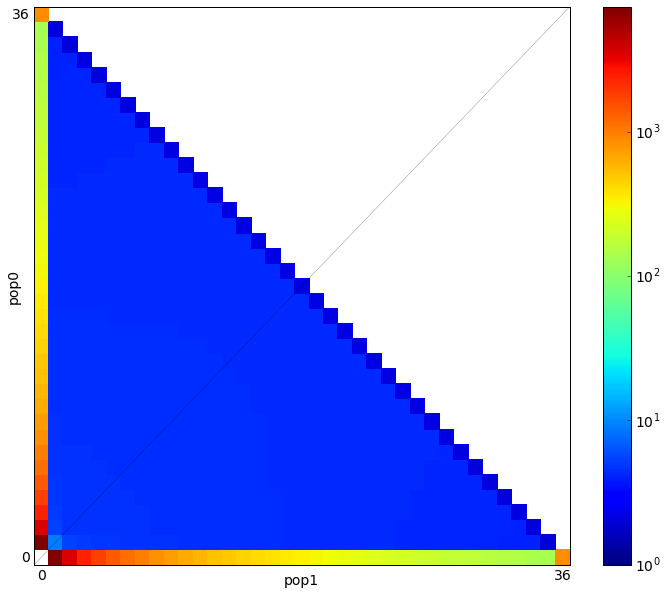

In [36]:
dadi.Plotting.plot_single_2d_sfs(dim, vmin=1, cmap=pylab.cm.jet)

This shall be the model to optimise the fit to.

## optimise _p_

In [37]:
from scipy.optimize import minimize_scalar

In [40]:
# test optimisation
# the function to optimise (cost function) 'f_2D' gets the optimally scaled divergence in isolation model
# to fit to itself.
# I want to see an optimal value for p of zero.
res_test = minimize_scalar(f_2D, method = 'bounded', bounds = (-1.0, 1.0), args = (dim, dim))

In [41]:
res_test

     fun: 0.0
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.0

That is as expected.

In [42]:
res = minimize_scalar(f_2D, method='bounded', bounds=(-1.0, 1.0), args=(dim, sfs2d))

In [43]:
res

     fun: 30634672.960740261
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.35319246572685198

This is remarkably close to the value of _p_ inferred for the 1D spectra and therefore a good sign.

In [44]:
sfs2d_m = modify2D(res.x, sfs2d)

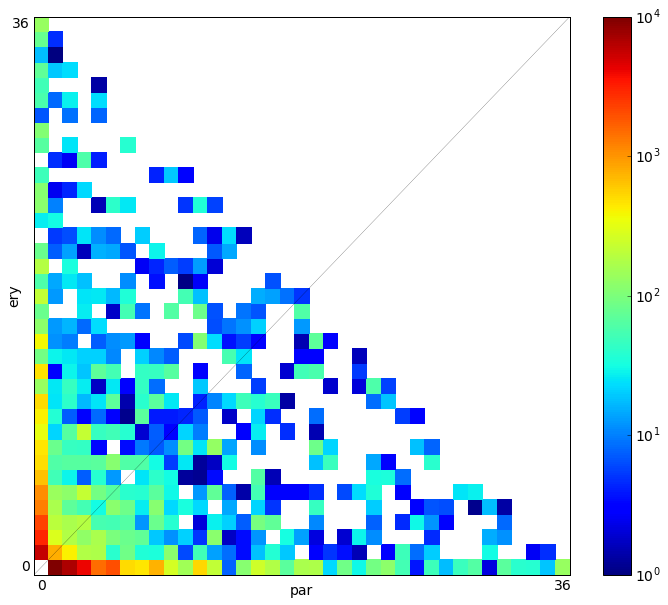

In [45]:
dadi.Plotting.plot_single_2d_sfs(sfs2d_m, vmin=1, cmap=pylab.cm.jet)

This looks reasonable.

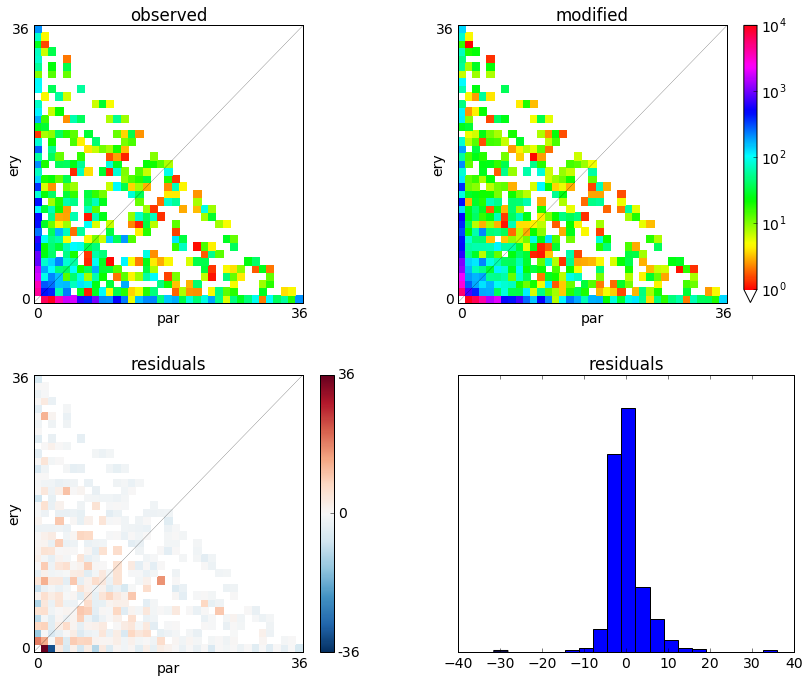

In [46]:
dadi.Plotting.plot_2d_comp_multinom(data=sfs2d, model=sfs2d_m, vmin=1, title=['observed', 'modified'])

This looks good to me.

## sensitivity of _p_ to the "neutral" model

I need to know whether I introduce a bias by choosing a certain null model for fitting. I therefore want to do two more fittings.
One using a null model with short and one with long divergence time.

### doubling divergence time

In [47]:
# calculate unfolded AFS under divergence in isolation model (dim) (up to a scaling factor theta)
params = (1, 1, 2) # note the doubling of divergence time

ns = sfs2d.sample_sizes
pts_l = [40, 50, 60]

dim = func_ex(params, ns, pts_l)
dim = dim.fold()

# optimally scale divergence in isolation model spectrum
dim = dadi.Inference.optimally_scaled_sfs(dim, sfs2d)

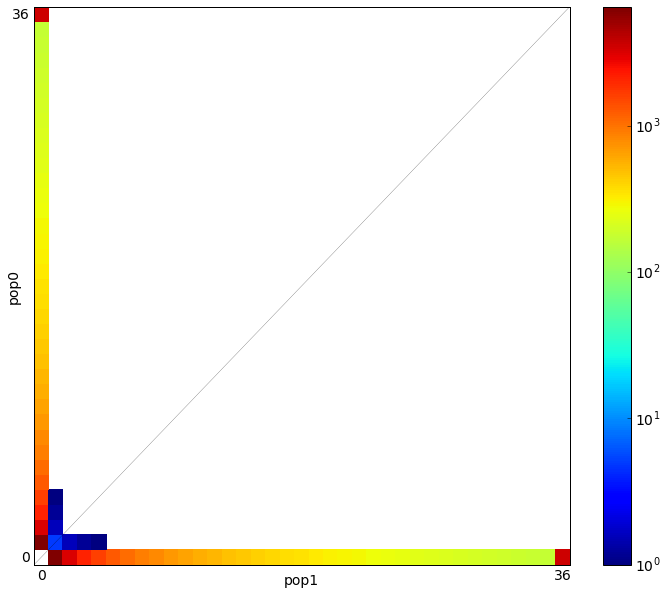

In [48]:
# plot null model
dadi.Plotting.plot_single_2d_sfs(dim, vmin=1, cmap=pylab.cm.jet)

In [49]:
res_a = minimize_scalar(f_2D, method='bounded', bounds=(-1.0, 1.0), args=(dim, sfs2d))

In [50]:
res_a

     fun: 58350581.920640469
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.30448684311763069

_p_ has decreased by 5 percentage points.

### halfing divergence time

In [51]:
# calculate unfolded AFS under divergence in isolation model (dim) (up to a scaling factor theta)
params = (1, 1, 0.5) # note the halfing of divergence time

ns = sfs2d.sample_sizes
pts_l = [40, 50, 60]

dim = func_ex(params, ns, pts_l)
dim = dim.fold()

# optimally scale divergence in isolation model spectrum
dim = dadi.Inference.optimally_scaled_sfs(dim, sfs2d)

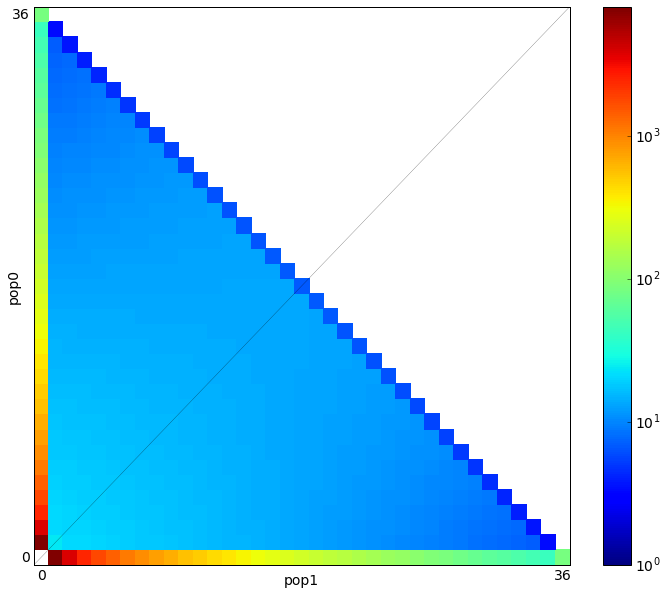

In [52]:
# plot null model
dadi.Plotting.plot_single_2d_sfs(dim, vmin=1, cmap=pylab.cm.jet)

In [53]:
res_b = minimize_scalar(f_2D, method='bounded', bounds=(-1.0, 1.0), args=(dim, sfs2d))

In [54]:
res_b

     fun: 25419201.221575346
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.39334370731547508

_p_ has increased by 4 percent.

How different are the corresponding corrected spectra?

In [55]:
# get corrected spectra

sfs2d_m_a = modify2D(res_a.x, sfs2d) # p=0.30
sfs2d_m_b = modify2D(res_b.x, sfs2d) # p=0.39

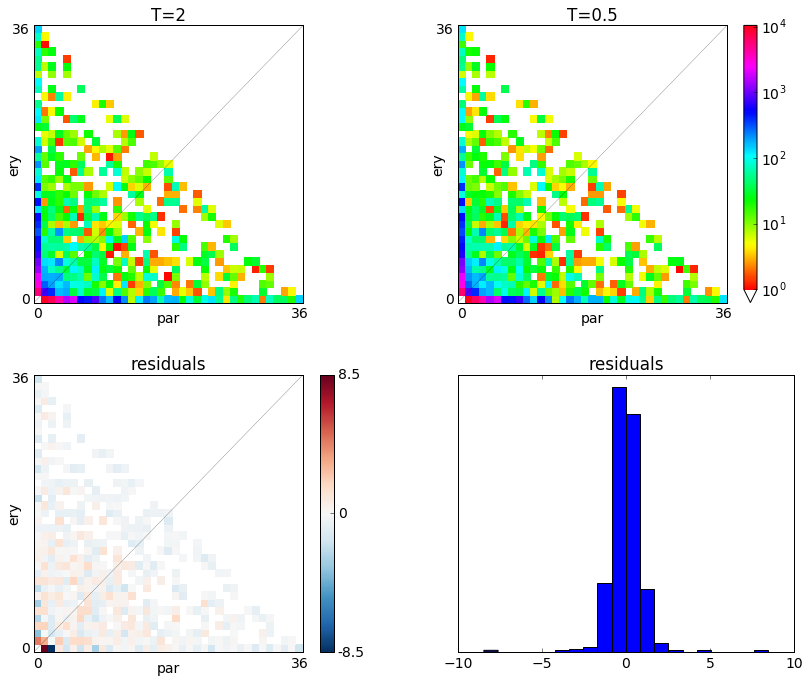

In [56]:
# plot corrected spectra and residuals
dadi.Plotting.plot_2d_comp_multinom(data=sfs2d_m_a, model=sfs2d_m_b, vmin=1, title=['T=2', 'T=0.5'])

The difference looks small, but I need to use the differently corrected spectra for model fitting to see whether the degree of correction has a strong influence on parameter inference.

# marginal spectra

In [57]:
ery_marg = sfs2d.marginalize([1])
par_marg = sfs2d.marginalize([0])

ery_p030_marg = sfs2d_m_a.marginalize([1])
par_p030_marg = sfs2d_m_a.marginalize([0])

ery_p039_marg = sfs2d_m_b.marginalize([1])
par_p039_marg = sfs2d_m_b.marginalize([0])

In [64]:
pylab.rcParams['figure.figsize'] = [18, 10]

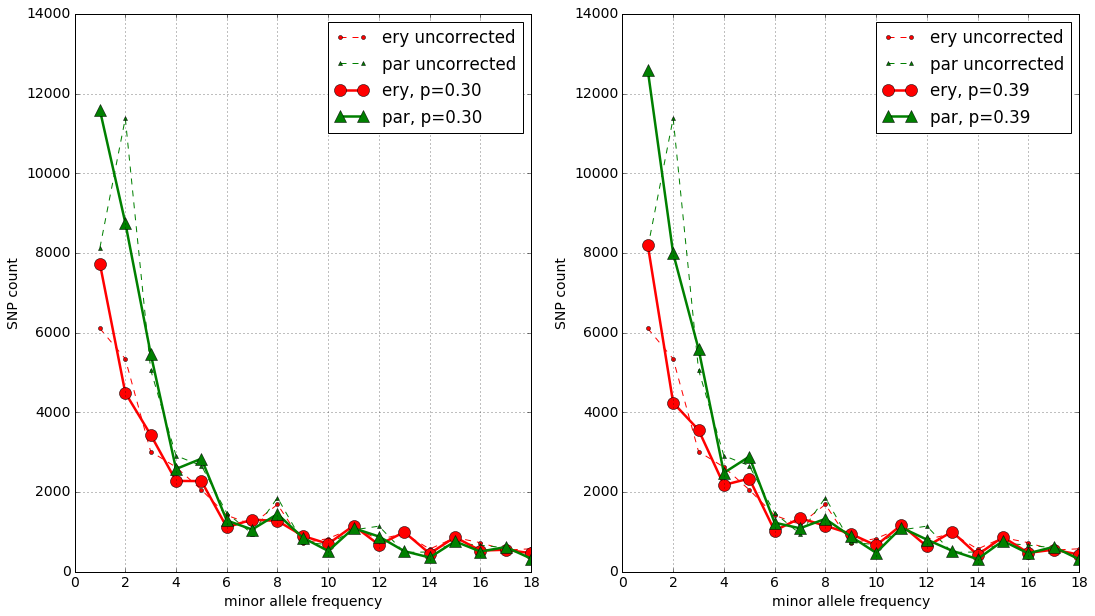

In [67]:
pylab.subplot(121)
pylab.grid()
pylab.plot(ery_marg, 'ro--', label='ery uncorrected', linewidth=1.0, markersize=4)
pylab.plot(par_marg, 'g^--', label='par uncorrected', linewidth=1.0, markersize=4)
pylab.plot(ery_p030_marg, 'ro-', label='ery, p=0.30', linewidth=2.5, markersize=12)
pylab.plot(par_p030_marg, 'g^-', label='par, p=0.30', linewidth=2.5, markersize=12)
pylab.xlabel("minor allele frequency")
pylab.ylabel("SNP count")
pylab.ylim(0, 14000)
pylab.legend()

pylab.subplot(122)
pylab.grid()
pylab.plot(ery_marg, 'ro--', label='ery uncorrected', linewidth=1.0, markersize=4)
pylab.plot(par_marg, 'g^--', label='par uncorrected', linewidth=1.0, markersize=4)
pylab.plot(ery_p039_marg, 'ro-', label='ery, p=0.39', linewidth=2.5, markersize=12)
pylab.plot(par_p039_marg, 'g^-', label='par, p=0.39', linewidth=2.5, markersize=12)
pylab.xlabel("minor allele frequency")
pylab.ylabel("SNP count")
pylab.ylim(0, 14000)
pylab.legend()

# save modified spectra

In [84]:
# save PAR modified spectrum to file
dadi.Spectrum.tofile(fs_par_m, fid="PAR_modified.sfs", comment_lines=['Ludovics correction applied'])

In [25]:
# load saved spectrum from file
fs = dadi.Spectrum.from_file("PAR_modified.sfs")

In [26]:
fs

Spectrum([-- 12915.24251537602 8838.689763323191 6002.904837950648 2856.149497976114
 3130.976938157446 1639.059218156099 665.3250728084156 2065.320792202926
 866.3130805251762 378.8554128425542 605.580566 1044.317868893252
 674.760989 318.8733371915845 244.455727 735.6248381217492
 967.4315409999999 19.7560204748239 -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- --], folded=True, pop_ids=None)

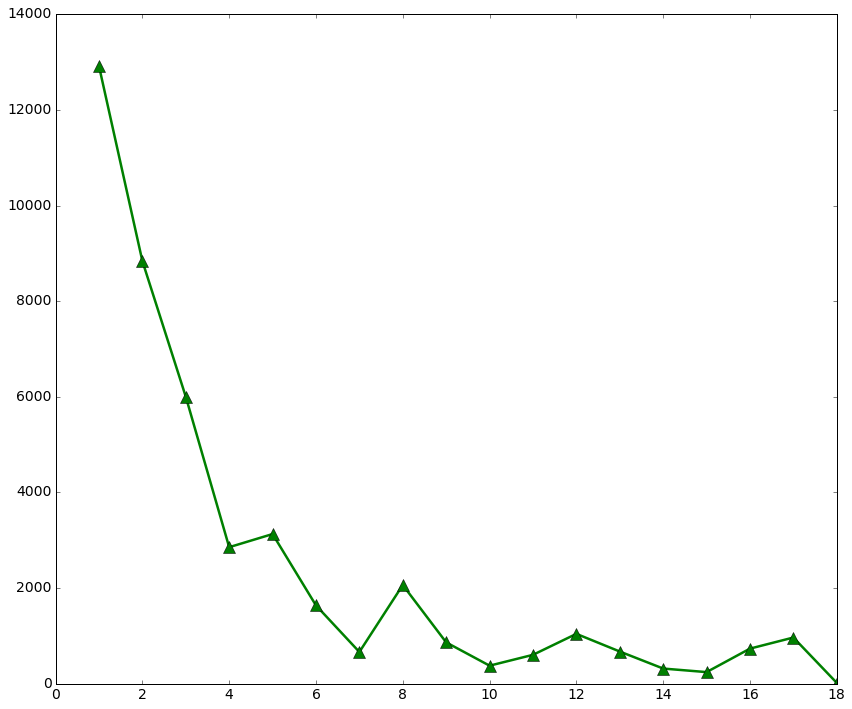

In [27]:
plt.plot(fs, 'g^-', label='par', linewidth=2.5, markersize=12)

In [28]:
fs.data.sum()

1214938.9999989998

In [93]:
# save modified ERY spectrum to file
dadi.Spectrum.tofile(fs_ery_m, fid="ERY_modified.sfs", comment_lines=['Ludovics correction applied'])

In [29]:
# load saved spectrum from file
fs = dadi.Spectrum.from_file("ERY_modified.sfs")

fs.data.sum()

1638468.0000000002

In [94]:
# save modified 2D spectrum to file 
dadi.Spectrum.tofile(sfs2d_m, fid="EryPar_modified.2dsfs", comment_lines=['Ludovics correction applied'])

In [98]:
# load saved 2D spectrum from file
fs2d = dadi.Spectrum.from_file("EryPar_modified.2dsfs")

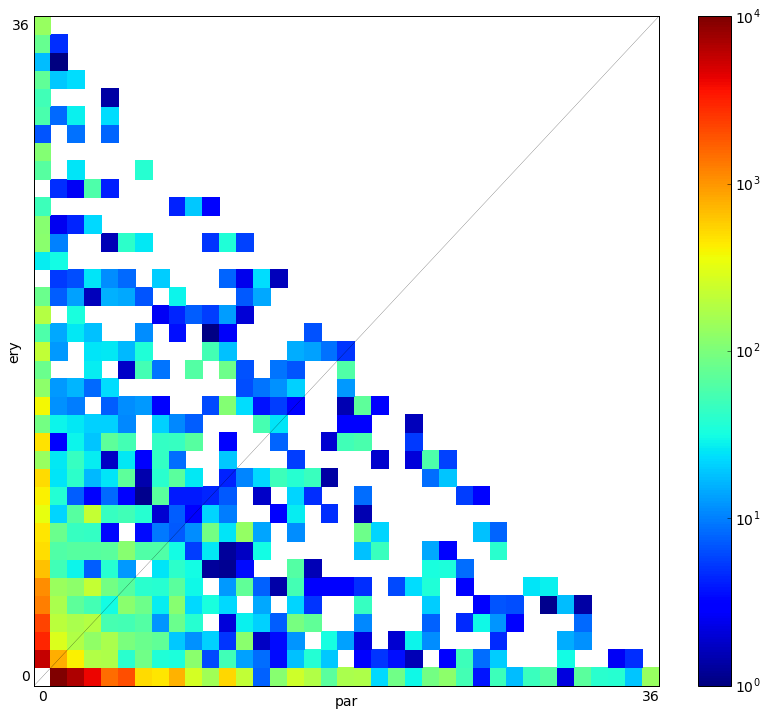

In [99]:
dadi.Plotting.plot_single_2d_sfs(fs2d, vmin=1, cmap=pylab.cm.jet)

In [49]:
# save modified 2D spectrum to file 
dadi.Spectrum.tofile(sfs2d_m, fid="EryPar_modified.2dsfs", comment_lines=['Ludovics correction applied, p=0.35'])

In [50]:
# save modified 2D spectrum to file 
dadi.Spectrum.tofile(sfs2d_m_a, fid="EryPar_modified_a.2dsfs", comment_lines=['Ludovics correction applied, p=0.30'])

In [51]:
# save modified 2D spectrum to file 
dadi.Spectrum.tofile(sfs2d_m_b, fid="EryPar_modified_b.2dsfs", comment_lines=['Ludovics correction applied, p=0.39'])